# Médias móveis Belo Jardim - PE (7-7 dias)

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import math
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


In [32]:
df = pd.read_excel('bd_belojardim.xlsx', sheet_name='covid', usecols=['data','casosNovos']) #lendo apenas coluna de data e casos
df.set_index('data', inplace=True) #definindo coluna de datas como indice 
display(df)

,casosNovos
data,
2022-01-01,0
2022-01-02,0
2022-01-03,0
2022-01-04,1
2022-01-05,4
...,...
2023-01-31,0
2023-02-01,3
2023-02-02,0


In [33]:
media_moveis = df['casosNovos'].rolling(window=7).mean() #usando função de media a cada 7 linhas 

df['media_moveis'] = media_moveis # Adicione a coluna de média móvel ao DataFrame

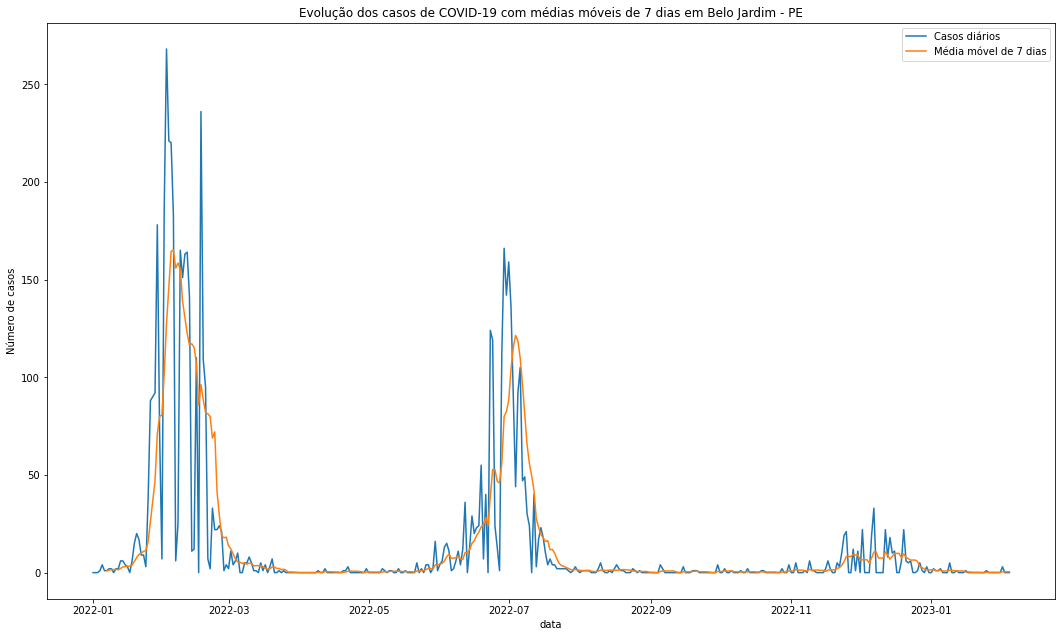

In [34]:
fig = plt.figure(figsize = (14, 8)) #estilizando gráfico
ax = fig.add_axes([0, 0, 1, 1]) #estilizando altura e largura gráfico

# Plot the data
ax.plot(df.index, df['casosNovos'], label='Casos diários', )
ax.plot(df.index, df['media_moveis'], label='Média móvel de 7 dias')

plt.title('Evolução dos casos de COVID-19 com médias móveis de 7 dias em Belo Jardim - PE')
plt.xlabel('data')
plt.ylabel('Número de casos')

plt.legend()


plt.show() #mostra gráfico

# Mínimos quadrados Belo Jardim - PE  |     ajustado em     y(t) = a0 + a1t + a2t²

In [35]:
dados = pd.read_excel('bd_belojardim.xlsx')
varx = dados['index'].values
vary = dados['casosAcumulado'].values
dates = dados['data']
dadosplanilha = []

In [36]:

for z in range(379):  #calculando de 21 em 21 dias 
    y2 = vary[z:21+z]
    x2 = varx[z:21+z]    
    xdate = dates[z].to_pydatetime() #Convertendo de timestamp para date
    xdate2 = dates[21+z].to_pydatetime() #Convertendo de timestamp para date
        
    df = pd.DataFrame({'x': x2, 'y': y2})

    # Adicionar colunas para x^2 e 1
    df['x2'] = df['x']**2
    df['ones'] = np.ones(len(df))

    # Criar a matriz X e o vetor y
    X = df[['x2', 'x', 'ones']].values
    y = df['y'].values

    # Calcular a solução para os coeficientes do ajuste quadrático usando o método dos mínimos quadrados
    a, b, c = np.linalg.lstsq(X, y, rcond=None)[0]

    # Armazenar os resultados nas variáveis 
    a_result = a
    b_result = b
    c_result = c
    
       
    dadosi = []
    yi = []
    for r in range(len(x2)):  #fazendo o loop do tamanho dos vetores
        y3 = y2[r]  
        x3 = x2[r] 
        func = round(a,4)*pow((x3),2)+round(b,4)*(x3)+round(c,4)  # calcular a previsão
        
        dadosi.append(func)
        yi.append(y3)
    

    erro_quadratico = mean_squared_error(yi, dadosi, squared=False)  #se false retorna o RMSE
    erro_relativo =  mean_absolute_error(yi,dadosi)
    #  print(dadosi)
    # print(yi)
    # print(round(erro_quadratico,4))
        
    func = round(a,4)*pow((22+z),2)+round(b,4)*(22+z)+round(c,4)  # calcular a previsão
    
    print(z+1, xdate2.date(), round(a_result,4),"x² ",round(b,4),"x ",round(c,4),'|| previsão',22+z,':', round(func,4), ' || RMSE: ', round(erro_quadratico,4), "|| Erro_Rel", round(erro_relativo,4))            
    
    dadosplanilha.append({'data': xdate2.date(),'a0.pol': round(c,4), 'a1.pol': round(b,4), 'a2.pol': round(a,4), 'Erro.pol':round(erro_quadratico,4), 'Previsao':round(func,4),'erro.previsao':round(erro_relativo,4)})
    #if z > 377:
     #     break;


1 2022-01-22 0.287 x²  -2.682 x  4681.4481 || previsão 22 : 4761.3521  || RMSE:  5.7372 || Erro_Rel 4.2907
2 2022-01-23 0.3445 x²  -3.9586 x  4687.2562 || previsão 23 : 4778.4489  || RMSE:  5.9875 || Erro_Rel 4.8207
3 2022-01-24 0.3854 x²  -5.0452 x  4693.5608 || previsão 24 : 4794.4664  || RMSE:  5.7456 || Erro_Rel 4.6259
4 2022-01-25 0.394 x²  -5.4955 x  4697.8863 || previsão 25 : 4806.7488  || RMSE:  5.5686 || Erro_Rel 4.4644
5 2022-01-26 0.4726 x²  -7.7204 x  4711.8971 || previsão 26 : 4830.6443  || RMSE:  5.9722 || Erro_Rel 4.8002
6 2022-01-27 0.7281 x²  -14.9122 x  4756.4212 || previsão 27 : 4884.5767  || RMSE:  15.2945 || Erro_Rel 10.2869
7 2022-01-28 1.1119 x²  -26.6141 x  4836.6002 || previsão 28 : 4963.135  || RMSE:  25.1049 || Erro_Rel 17.3929
8 2022-01-29 1.5736 x²  -41.8596 x  4951.9447 || previsão 29 : 5061.4139  || RMSE:  32.8522 || Erro_Rel 24.6767
9 2022-01-30 2.3018 x²  -67.28 x  5157.0802 || previsão 30 : 5210.3002  || RMSE:  47.5846 || Erro_Rel 36.7973
10 2022-01-31

In [37]:
#criar arquivo para armazenar os dados igual a planilha de enunciado do trabalho
casa = pd.DataFrame(dadosplanilha, index=range(1, len( dadosplanilha)+1))
casa.to_excel('dados.xlsx', index=False, sheet_name='Dados')

# As três melhores previsões

In [38]:
#função para calcular o mmc para as melhores e piores previsões
def calcular_coef(x2, y2):    
    df = pd.DataFrame({'x': x2, 'y': y2})
    # Adicionar colunas para x^2 e 1
    df['x2'] = df['x']**2
    df['ones'] = np.ones(len(df))
    # Criar a matriz X e o vetor y
    X = df[['x2', 'x', 'ones']].values
    y = df['y'].values
    # Calcular a solução para os coeficientes do ajuste quadrático usando o método dos mínimos quadrados
    a, b, c = np.linalg.lstsq(X, y, rcond=None)[0]
    # Armazenar os resultados nas variáveis 
    a_result = a
    b_result = b
    c_result = c
    
    dadosi = []
    yi = []
    for r in range(len(x2)):  #fazendo o loop do tamanho dos vetores
        y3 = y2[r]  
        x3 = x2[r] 
        func = round(a,4)*pow((x3),2)+round(b,4)*(x3)+round(c,4)  # calcular a previsão
        
        dadosi.append(func)
        yi.append(y3)
   

    ultimo_index = len(x2) - 1    
    ultimovalor = x2[ultimo_index]+1
    
    func_prox_dia = round(a,4)*pow((ultimovalor),2)+round(b,4)*(ultimovalor)+round(c,4)  #previsao proximo dia
    
    
    valor_estimado = [ultimovalor, func_prox_dia]
    
    
    
    return dadosi, ultimovalor,  func_prox_dia

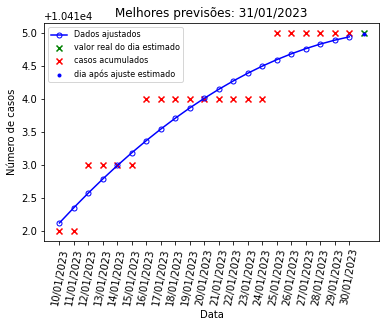

In [39]:
dados['data'] = pd.to_datetime(dados['data'])
dados['data_formatada'] = dados['data'].dt.strftime('%d/%m/%Y')
dataconvertida = dados['data_formatada']    
xdate2 = dataconvertida[374:395]

g1x = varx[374:395]
g1y = vary[374:395]


dadosi, ultimovalor,  func_prox_dia = calcular_coef(g1x,g1y)

plt.scatter(varx[395], vary[395], color=['green'], marker='x', label='valor real do dia estimado')
plt.scatter(g1x,g1y , color=['red'], marker='x', label='casos acumulados')
plt.scatter(ultimovalor,func_prox_dia , color='b', marker='.', label='dia após ajuste estimado') #ponto estimado
plt.plot(g1x, dadosi,color='b', marker='.', markersize=10, linestyle='solid', mfc='none', mec='b', label='Dados ajustados'); #ajustando dados de X na nova função

plt.xticks(g1x,  xdate2, rotation=80)

plt.title('Melhores previsões: 31/01/2023')
plt.xlabel('Data')
plt.ylabel('Número de casos')
plt.legend(prop={'size': 8})

plt.show()

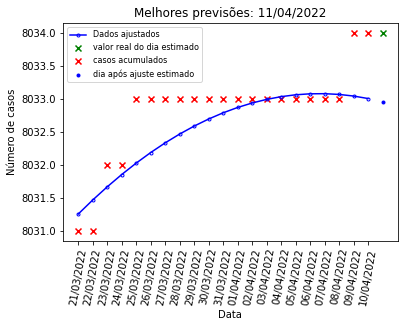

In [40]:
xdate2 = dataconvertida[79:100]

g2x = varx[79:100]
g2y = vary[79:100]



dadosi, ultimovalor,  func_prox_dia = calcular_coef(g2x,g2y)

plt.scatter(varx[100], vary[100], color=['green'], marker='x', label='valor real do dia estimado')
plt.scatter(g2x,g2y , color=['red'], marker='x', label='casos acumulados')
plt.scatter(ultimovalor,func_prox_dia , color=['blue'], marker='.', label='dia após ajuste estimado') #ponto estimado
plt.plot(g2x, dadosi,color='b', marker='.', linestyle='solid', mfc='none', mec='b', label='Dados ajustados'); #ajustando dados de X na nova função

plt.xticks(g2x,  xdate2, rotation=80)

plt.title('Melhores previsões: 11/04/2022')
plt.xlabel('Data')
plt.ylabel('Número de casos')

plt.legend(prop={'size': 8})
plt.show()

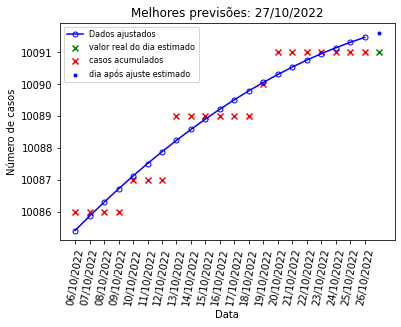

In [41]:
xdate2 = dataconvertida[278:299]


g3x = varx[278:299]
g3y = vary[278:299]

dadosi, ultimovalor,  func_prox_dia = calcular_coef(g3x,g3y)

plt.scatter(varx[299], vary[299], color=['green'], marker='x', label='valor real do dia estimado')
plt.scatter(g3x,g3y , color=['red'], marker='x', label='casos acumulados')
plt.scatter(ultimovalor,func_prox_dia , color=['blue'], marker='.', label='dia após ajuste estimado') #ponto estimado
plt.plot(g3x, dadosi,color='b', marker='.',  markersize=10, linestyle='solid', mfc='none', mec='b', label='Dados ajustados'); #ajustando dados de X na nova função

plt.xticks(g3x,  xdate2, rotation=80)

plt.title('Melhores previsões: 27/10/2022')
plt.xlabel('Data')
plt.ylabel('Número de casos')

plt.legend(prop={'size': 8})
plt.show()

# As três piores previsões

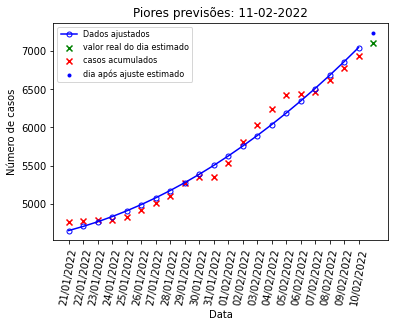

In [42]:
xdate2 = dataconvertida[20:41]

b1x = varx[20:41]
b1y = vary[20:41]
b1 = calcular_coef(b1x, b1y)

dadosi, ultimovalor,  func_prox_dia = calcular_coef(b1x, b1y)

plt.scatter(varx[41], vary[41], color=['green'], marker='x', label='valor real do dia estimado')
plt.scatter(b1x,b1y , color=['red'], marker='x', label='casos acumulados')
plt.scatter(ultimovalor,func_prox_dia , color=['blue'], marker='.', label='dia após ajuste estimado') #ponto estimado
plt.plot(b1x, dadosi,color='b', marker='.',  markersize=10, linestyle='solid', mfc='none', mec='b', label='Dados ajustados'); #ajustando dados de X na nova função

plt.xticks(b1x,  xdate2, rotation=80)

plt.title('Piores previsões: 11-02-2022')
plt.xlabel('Data')
plt.ylabel('Número de casos')

plt.legend(prop={'size': 8})
plt.show()


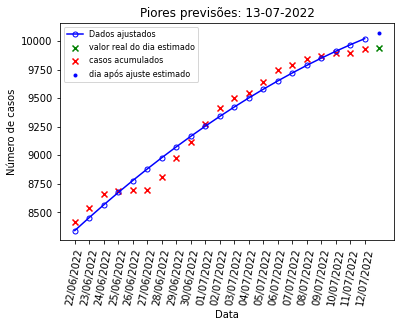

In [43]:
xdate2 = dataconvertida[172:193]

b2x = varx[172:193]
b2y = vary[172:193]
b2 = calcular_coef(b2x, b2y)


dadosi, ultimovalor,  func_prox_dia = calcular_coef(b2x, b2y)

plt.scatter(varx[193], vary[193], color=['green'], marker='x', label='valor real do dia estimado')
plt.scatter(b2x,b2y , color=['red'], marker='x', label='casos acumulados')
plt.scatter(ultimovalor,func_prox_dia , color=['blue'], marker='.', label='dia após ajuste estimado') #ponto estimado
plt.plot(b2x, dadosi,color='b', marker='.',  markersize=10, linestyle='solid', mfc='none', mec='b', label='Dados ajustados'); #ajustando dados de X na nova função

plt.xticks(b2x,  xdate2, rotation=80)

plt.title('Piores previsões: 13-07-2022')
plt.xlabel('Data')
plt.ylabel('Número de casos')

plt.legend(prop={'size': 8})
plt.show()


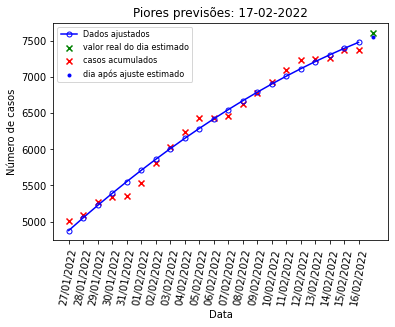

In [44]:
xdate2 = dataconvertida[26:47]

b3x = varx[26:47]
b3y = vary[26:47]
calcular_coef(b3x, b3y)

dadosi, ultimovalor,  func_prox_dia = calcular_coef(b3x, b3y)

plt.scatter(varx[47], vary[47], color=['green'], marker='x', label='valor real do dia estimado')
plt.scatter(b3x,b3y , color=['red'], marker='x', label='casos acumulados')
plt.scatter(ultimovalor,func_prox_dia , color=['blue'], marker='.', label='dia após ajuste estimado') #ponto estimado
plt.plot(b3x, dadosi,color='b', marker='.',  markersize=10, linestyle='solid', mfc='none', mec='b', label='Dados ajustados'); #ajustando dados de X na nova função

plt.xticks(b3x,  xdate2, rotation=80)

plt.title('Piores previsões: 17-02-2022')
plt.xlabel('Data')
plt.ylabel('Número de casos')

plt.legend(prop={'size': 8})
plt.show()

